# TOI-469: Multiplanet system

### download data

In [2]:
import matplotlib.pyplot as plt

In [3]:
from CONAN3.get_files import get_TESS_data

df = get_TESS_data("TOI-469")
df.search() 

SearchResult containing 11 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 06 2018              SPOC     120    33692729      0.0
  1 TESS Sector 33 2020              SPOC     120    33692729      0.0
  2 TESS Sector 06 2018         TESS-SPOC    1800    33692729      0.0
  3 TESS Sector 33 2020         TESS-SPOC     600    33692729      0.0
  4 TESS Sector 06 2018               QLP    1800    33692729      0.0
  5 TESS Sector 33 2020               QLP     600    33692729      0.0
  6 TESS Sector 06 2018             TASOC     120    33692729      0.0
  7 TESS Sector 06 2018 GSFC-ELEANOR-LITE    1800    33692729      0.0
  8 TESS Sector 06 2018             TASOC    1800    33692729      0.0
  9 TESS Sector 06 2018             TASOC    1800    33692729      0.0
 10 TESS Sector 06 2018           

In [4]:
df.download(sectors=[6],author="SPOC", select_flux="pdcsap_flux",quality_bitmask='hardest')

downloaded lightcurve for sector 6


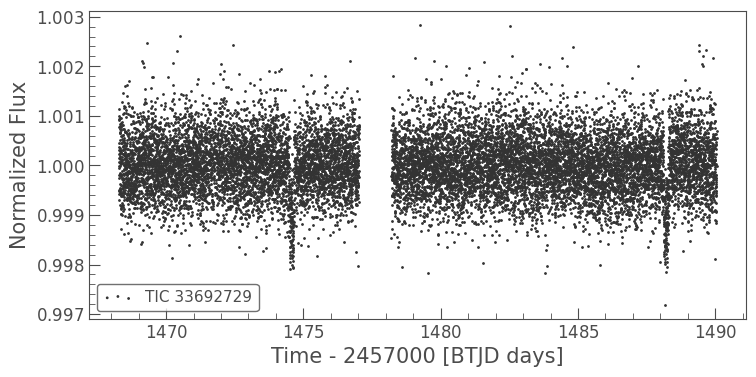

In [5]:
df.scatter()

In [6]:
df.lc[6]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1468.2765156441103,1.0003686e+00,5.3308753e-04,4.4497726e-03,173388,2045.16203,1433.74426,4.7041805e+04,2.4428167e+01,2.2512058e+03,6.0795965e+00,4.9298578e+04,2.6270775e+01,0,———,———,———,———,2045.16203,3.9099308e-04,1433.74426,4.1152441e-04,-3.1414698e-03,5.0656389e-02
1468.2779045547768,1.0011431e+00,5.3327845e-04,4.4497950e-03,173389,2045.15963,1433.74530,4.7089805e+04,2.4436914e+01,2.2547537e+03,6.0716462e+00,4.9336746e+04,2.6280182e+01,0,———,———,———,———,2045.15963,3.9057728e-04,1433.74530,4.1132391e-04,-7.5941146e-03,5.2372649e-02
1468.2792934649765,1.0001494e+00,5.3307181e-04,4.4498169e-03,173390,2045.16082,1433.74552,4.7034121e+04,2.4427448e+01,2.2429822e+03,6.0773330e+00,4.9287773e+04,2.6270000e+01,0,———,———,———,———,2045.16082,3.9182263e-04,1433.74552,4.1180980e-04,-6.0678064e-03,5.2114032e-02
1468.2806823756425,9.9929446e-01,5.3273072e-04,4.4498392e-03,173391,2045.16119,1433.74904,4.6980629e+04,2.4411816e+01,2.2556538e+03,6.0712709e+00,4.9245645e+04,2.6253189e+01,0,———,———,———,———,2045.16119,3.9197798e-04,1433.74904,4.1175954e-04,-4.5641898e-03,5.6188624e-02
1468.2820712858434,9.9947828e-01,5.3298456e-04,4.4498611e-03,173392,2045.15835,1433.74381,4.7005977e+04,2.4423447e+01,2.2471138e+03,6.0799923e+00,4.9254703e+04,2.6265699e+01,0,———,———,———,———,2045.15835,3.9125531e-04,1433.74381,4.1201577e-04,-9.0965033e-03,5.0934661e-02
1468.2834601965094,1.0009104e+00,5.3298671e-04,4.4498835e-03,173393,2045.15778,1433.74794,4.7070641e+04,2.4423546e+01,2.2367927e+03,6.0600801e+00,4.9325277e+04,2.6265806e+01,0,———,———,———,———,2045.15778,3.9061293e-04,1433.74794,4.1140502e-04,-9.3801646e-03,5.5376288e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490.0417459829196,9.9947691e-01,5.3287327e-04,4.4112061e-03,189059,2045.18627,1433.67145,4.7063625e+04,2.4418346e+01,2.2165503e+03,6.0424118e+00,4.9254637e+04,2.6260214e+01,0,———,———,———,———,2045.18627,3.9322340e-04,1433.67145,4.1255361e-04,2.0116994e-02,-3.2107934e-02


In [7]:
df.save_CONAN_lcfile(bjd_ref = 2457000, folder="data", out_filename="TOI469_S06.dat")

saved file as: data/TOI469_S062.dat


## CONAN Analysis

In [1]:
from glob import glob
from os.path import basename

import numpy as np
import CONAN3
import matplotlib.pyplot as plt
import pandas as pd
print(f"CONAN version: {CONAN3.__version__}")

CONAN version: 3.1.4


   - Transit Photometry: 2 sectors of TESS
   - RV: ESPRESSO

## Setup light curve object

In [2]:
path = "data/"
lc_list  = ["TOI469_S06.dat","TOI469_S33.dat"]

### load light curve into CONAN

In [5]:
lc_obj = CONAN3.load_lightcurves(file_list     = lc_list, 
                                  data_filepath = path, 
                                  filters       = ["T"], 
                                  lamdas        = [0.8],
                                  nplanet=3)
lc_obj

# ============ Input lightcurves, filters baseline function =======================================================
name           filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7 col8|sin id GP spline_config  
TOI469_S06.dat T    0.8  |None    None    None    |   0    0    0    0    0    0    0|  0  1 n  None           
TOI469_S33.dat T    0.8  |None    None    None    |   0    0    0    0    0    0    0|  0  2 n  None           


lightcurves from filepath: data/
3 transiting planet(s)
Order of unique filters: ['T']

- The lc_obj object holds information now about the light curves. The light curves can be plotted using the `plot` method of the object.

By default this plots column 0 (time) against column 1 (flux) with column 3(flux err) as uncertainties. 

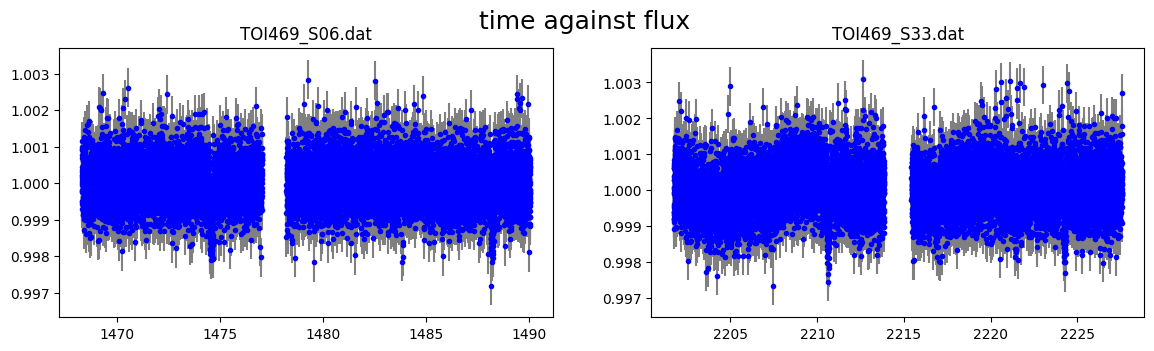

In [6]:
lc_obj.plot()

In [7]:
lc_obj.clip_outliers(clip=4, width=15)


TOI469_S06.dat: Rejected 81 points more than 4.0 x MAD from the median

TOI469_S33.dat: Rejected 111 points more than 4.0 x MAD from the median


### Planet parameters

In [9]:
traocc_pars =dict( T_0            = [(2210.634,0.1), (2207.252,0.1), (2225.259,0.1)],
                    Period        = [(13.63083,3e-4),(3.53796,3e-4), (6.42975,3e-4)],
                    Impact_para   = [(0, 0.28, 1), (0, 0.617,1), (0,0.273,1)],
                    RpRs          = [(0.001,0.0321,0.1), (0.001,0.0146,0.1), (0.001,0.0127,0.1)],
                    rho_star      = (1.42,0.1),
                    K             = (0,2,20)     #m/s - unit of rv data
                  )


In [10]:
lc_obj.planet_parameters(**traocc_pars)

# ============ Planet parameters (Transit and RV) setup ========================================================== 
name        	fit	prior
rho_star    	y  	N(1.42,0.1)
------------
RpRs_1      	y  	U(0.001,0.0321,0.1)
Impact_para_1	y  	U(0,0.28,1)
T_0_1       	y  	N(2210.634,0.1)
Period_1    	y  	N(13.63083,0.0003)
Eccentricity_1	n  	F(0)
omega_1     	n  	F(90)
K_1         	y  	U(0,2,20)
------------
RpRs_2      	y  	U(0.001,0.0146,0.1)
Impact_para_2	y  	U(0,0.617,1)
T_0_2       	y  	N(2207.252,0.1)
Period_2    	y  	N(3.53796,0.0003)
Eccentricity_2	n  	F(0)
omega_2     	n  	F(90)
K_2         	y  	U(0,2,20)
------------
RpRs_3      	y  	U(0.001,0.0127,0.1)
Impact_para_3	y  	U(0,0.273,1)
T_0_3       	y  	N(2225.259,0.1)
Period_3    	y  	N(6.42975,0.0003)
Eccentricity_3	n  	F(0)
omega_3     	n  	F(90)
K_3         	y  	U(0,2,20)


### limb darkening

In [11]:
q1,q2 = lc_obj.get_LDs(Teff=(5289,69),
                       logg=(4.24,0.13),
                       Z=(0.24,0.05),
                       filter_names=["TESS"], use_result=True)

TESS      (T): q1=(0.3538, 0.0198), q2=(0.4033, 0.0151)

Setting-up limb-darkening priors from LDTk result
# ============ Limb darkening setup ============================================================================= 
filters	fit	q_1              	q_2              
T      	y  	N(0.3538,0.0198) 	N(0.4033,0.0151) 


- manually define baseline for each lc - just a GP 

In [12]:
lc_obj.lc_baseline(gp = "ce")

# ============ Input lightcurves, filters baseline function =======================================================
name           filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7 col8|sin id GP spline_config  
TOI469_S06.dat T    0.8  |None    W15C4   None    |   0    0    0    0    0    0    0|  0  1 ce None           
TOI469_S33.dat T    0.8  |None    W15C4   None    |   0    0    0    0    0    0    0|  0  2 ce None           


### add GP

get estimate rms of each light curve to use as starting point of gp amplitude

In [18]:
np.array(lc_obj._rms_estimate)*1e6

array([547.99430013, 567.6340518 ])

In [22]:
lc_obj.add_GP(lc_list     = "all",
              par         = ["col0","col0"],
              kernel      = "mat32",
              amplitude   = (20,500, 5000),    #in ppm, uses log-uniform prior    
              lengthscale = (0.007,1, 30),    #in days, also log-uniform prior
             )

# ==================== Photometry GP properties ==================================================================
name           par1 kern1 Amplitude1_ppm     length_scale      |op| par2 kern2 Amplitude2_ppm     length_scale2    
TOI469_S06.dat col0 mat32 LU(20,500,5000)    LU(0.007,1,30)    |--| None None  None               None              
TOI469_S33.dat col0 mat32 LU(20,500,5000)    LU(0.007,1,30)    |--| None None  None               None              


## Setup RV

In [23]:
import CONAN3
import matplotlib.pyplot as plt
path = "data/"


In [24]:
rv_list = ["TOI469rv1.dat", "TOI469rv2.dat" ]
rv_obj = CONAN3.load_rvs(file_list     = rv_list, 
                         data_filepath = path,
                         nplanet       = 3,
                         rv_unit       = "m/s"
                        )
rv_obj

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          RVunit scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s      
TOI469rv1.dat m/s    None    |   0    0    0    0|   0 n  None            | F(0.0)        
TOI469rv2.dat m/s    None    |   0    0    0    0|   0 n  None            | F(0.0)        


rvs from filepath: data/
3 planet(s)

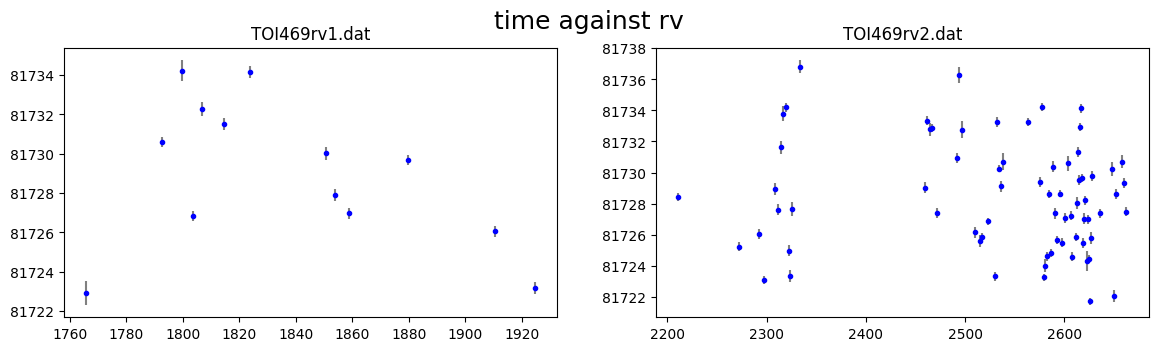

In [25]:
rv_obj.plot()

In [26]:
rv_obj.rv_baseline(gamma = (81728,10), gam_steps=1, gp="y")

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          RVunit scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s      
TOI469rv1.dat m/s    None    |   0    0    0    0|   0 y  None            | N(81728,10)   
TOI469rv2.dat m/s    None    |   0    0    0    0|   0 y  None            | N(81728,10)   


In [27]:
rv_obj.add_rvGP(rv_list   = 'same',
              par         = [("col0",        "col0")],
              kernel      = [("cos",         "expsq")],
              amplitude   = [((0.1, 2, 20),    (1,10, 20))],    #in same unit as rv, uses log-uniform prior    
              lengthscale = [((0.01,1, 100), (0.01,1, 60))],    #in days, also log-uniform prior
              operation  = ["+"]    
             )

# ==================== RV GP properties ========================================================================== 
name          par1 kern1 Amplitude1         length_scale      |op| par2 kern2 Amplitude2         length_scale2  
same          col0 cos   LU(0.1,2,20)       LU(0.01,1,100)    |+ | col0 expsq LU(1,10,20)        LU(0.01,1,60)   


## Setup Sampling

In [29]:
fit_obj = CONAN3.fit_setup( R_st = (0.993,0.034),
                            M_st = (0.88,0.035))

# ============ Stellar input properties ======================================================================
# parameter     value 
Radius_[Rsun]  N(0.993,0.034)
Mass_[Msun]    N(0.880,0.035)
Input_method:[R+rho(Rrho), M+rho(Mrho)]: Rrho


In [32]:
fit_obj.sampling(n_cpus=10)

# ============ FIT setup =====================================================================================
Number_steps                       2000 
Number_chains                      64 
Number_of_processes                10 
Burnin_length                      500 
n_live                             300 
force_nlive                        False 
d_logz                             0.1 
Sampler(emcee/dynesty)             dynesty 
emcee_move(stretch/demc/snooker)   stretch 
leastsq_for_basepar(y/n)           n 
apply_LCjitter(y/n)                y 
apply_RVjitter(y/n)                y 
LCjitter_loglims([lo,hi])          [-15, -4] 
RVjitter_lims([lo,hi])             [0, 5] 
LCbasecoeff_lims(auto/[lo,hi])     auto 
RVbasecoeff_lims(auto/[lo,hi])     auto 


## Export configuration

In [33]:
CONAN3.create_configfile(lc_obj, rv_obj, fit_obj,
                         filename='TOI469_lc_rvconfig.dat')

configuration file saved as TOI469_lc_rvconfig.dat


The config file can be reloaded to create all required objects to perform the fit

In [ ]:
import CONAN3
lc_obj, rv_obj, fit_obj = CONAN3.load_configfile('TOI469_lc_rvconfig.dat',verbose=True)

## Performing the fit

finally perform the fitting which is saved to a `results` object that holds the chains of the mcmc and allows subsequent plotting

In [ ]:
result = CONAN3.run_fit(lc_obj,rv_obj, fit_obj, 
                        out_folder="result_TOI469_multi", 
                        rerun_result=True);

## Results

In [15]:
import CONAN3
from CONAN3.utils import bin_data, phase_fold
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
result =CONAN3.load_result("result_TOI469_multi")
result

['lc'] Output files, ['TOI469_S06_lcout.dat', 'TOI469_S33_lcout.dat'], loaded into result object
['rv'] Output files, ['TOI469rv1_rvout.dat', 'TOI469rv2_rvout.dat'], loaded into result object


Object containing posterior from emcee/dynesty sampling                 
Parameters in chain are:
	 ['rho_star', 'T_0_1', 'RpRs_1', 'Impact_para_1', 'Period_1', 'K_1', 'T_0_2', 'RpRs_2', 'Impact_para_2', 'Period_2', 'K_2', 'T_0_3', 'RpRs_3', 'Impact_para_3', 'Period_3', 'K_3', 'T_q1', 'T_q2', 'lc1_logjitter', 'lc2_logjitter', 'rv1_gamma', 'rv1_jitter', 'rv2_gamma', 'rv2_jitter', 'lc1_off', 'lc2_off', 'GPlc1_Amp0_col0', 'GPlc1_len0_col0', 'GPlc2_Amp0_col0', 'GPlc2_len0_col0', 'GPrvSame_Amp0_col0', 'GPrvSame_len0_col0', 'GPrvSame_Amp1_col0', 'GPrvSame_len1_col0']                 

use `plot_chains()`, `plot_burnin_chains()`, `plot_corner()` or `plot_posterior()` methods on selected parameters to visualize results.

In [3]:
result.plot_chains(['Period_1','Period_2','Period_3'],figsize=(7,4));

chains are not available for dynesty sampler


### LC

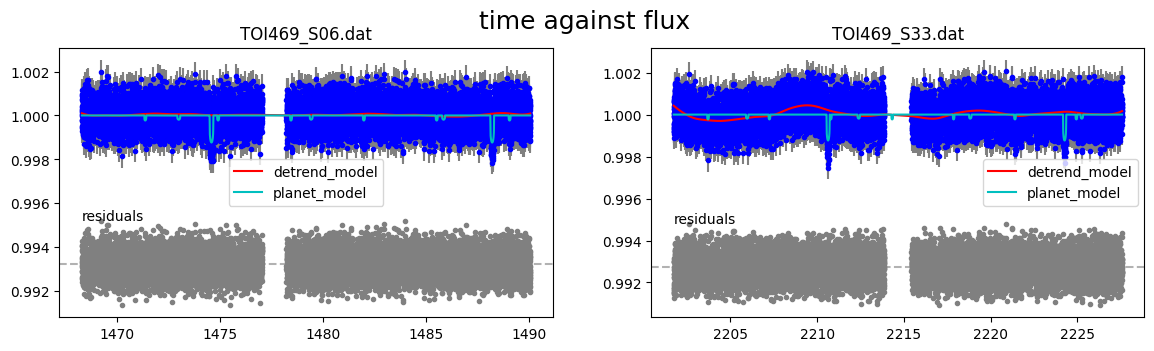

In [11]:
fig = result.lc.plot_bestfit()

In [12]:
result.lc.names

['TOI469_S06.dat', 'TOI469_S33.dat']

In [13]:
#load output data files for the lc fits
lc1data = result.lc.outdata['TOI469_S06.dat']
lc2data = result.lc.outdata['TOI469_S33.dat']

lc1data.head()

,time,flux,error,full_mod,gp*base,transit,det_flux,spl_fit,phase_1,phase_2,phase_3
0,1468.276516,1.000369,0.000533,1.000100,1.000100,1.0,1.000269,1.0,-0.461636,0.130116,0.268499
1,1468.277905,1.001143,0.000533,1.000099,1.000099,1.0,1.001044,1.0,-0.461534,0.130508,0.268715
2,1468.279293,1.000149,0.000533,1.000099,1.000099,1.0,1.000051,1.0,-0.461432,0.130901,0.268931
3,1468.280682,0.999294,0.000533,1.000098,1.000098,1.0,0.999196,1.0,-0.461330,0.131293,0.269147
4,1468.282071,0.999478,0.000533,1.000098,1.000098,1.0,0.999381,1.0,-0.461228,0.131686,0.269363


In [16]:
#join two outputs in a single dataframe (so we can plot the model across the times)
lcdata = pd.concat([lc1data,lc2data])
lcdata

,time,flux,error,full_mod,gp*base,transit,det_flux,spl_fit,phase_1,phase_2,phase_3
0,1468.276516,1.000369,0.000533,1.000100,1.000100,1.0,1.000269,1.0,-0.461636,0.130116,0.268499
1,1468.277905,1.001143,0.000533,1.000099,1.000099,1.0,1.001044,1.0,-0.461534,0.130508,0.268715
2,1468.279293,1.000149,0.000533,1.000099,1.000099,1.0,1.000051,1.0,-0.461432,0.130901,0.268931
3,1468.280682,0.999294,0.000533,1.000098,1.000098,1.0,0.999196,1.0,-0.461330,0.131293,0.269147
4,1468.282071,0.999478,0.000533,1.000098,1.000098,1.0,0.999381,1.0,-0.461228,0.131686,0.269363
...,...,...,...,...,...,...,...,...,...,...,...
17342,2227.569050,0.999922,0.000532,1.000163,1.000163,1.0,0.999759,1.0,0.242409,-0.257468,0.359542
17343,2227.571828,0.999871,0.000532,1.000164,1.000164,1.0,0.999707,1.0,0.242613,-0.256683,0.359974
17344,2227.573216,1.000204,0.000532,1.000165,1.000165,1.0,1.000040,1.0,0.242715,-0.256291,0.360190
17345,2227.574605,0.999079,0.000532,1.000165,1.000165,1.0,0.998914,1.0,0.242817,-0.255898,0.360406


In [17]:
# evaluate the transit model across both datasets and get individual planet's transit model
lcmod = result.lc.evaluate(file='TOI469_S06.dat',time=np.array(lcdata["time"]), 
                               return_std=True,nsamp=100)

In [18]:
list(lcmod.__dict__)

['planet_model', 'components', 'sigma_low', 'sigma_high']

#### Individual components

In [20]:
lc_comp = lcmod.components
lc_comp.keys()

dict_keys(['pl_1', 'pl_2', 'pl_3'])

##### planet 1

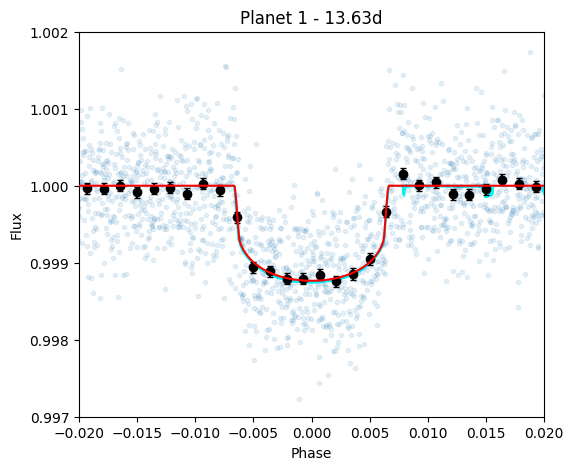

In [21]:
srt = np.argsort(lcdata["phase_1"])
subtract_signal = (lc_comp["pl_2"]-1) + (lc_comp["pl_3"]-1)
lc_pl1 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 1 - {result.params_dict['Period_1']:.2f}d")

plt.plot(lcdata["phase_1"], lc_pl1,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t = np.array(lcdata["phase_1"])[srt], 
                                f = np.array(lc_pl1)[srt], 
                               err= np.array(lcdata["error"])[srt],
                                bins = 700)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_1"])[srt], lc_comp["pl_1"][srt],"r",zorder=3)

plt.fill_between(np.array(lcdata["phase_1"])[srt],
                 (lcmod.sigma_low - subtract_signal)[srt], 
                 (lcmod.sigma_high - subtract_signal)[srt], color="cyan")


plt.ylim([0.997,1.002])
plt.xlim([-0.02,0.02])
plt.ylabel("Flux")
plt.xlabel("Phase");


##### planet 2

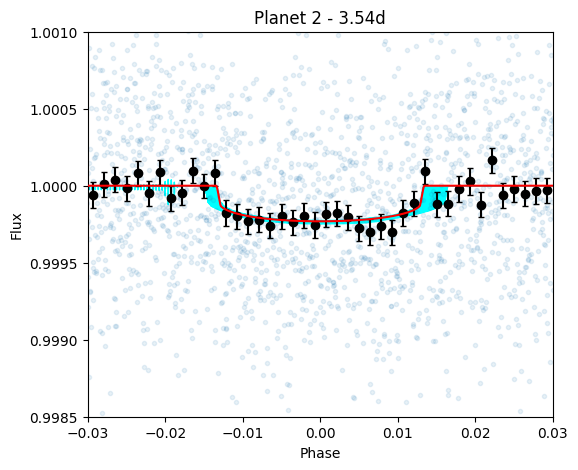

In [40]:
srt = np.argsort(lcdata["phase_2"])
subtract_signal = (lc_comp["pl_1"]-1)+(lc_comp["pl_3"]-1)
lc_pl2 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 2 - {result.params_dict['Period_2']:.2f}d")

plt.plot(lcdata["phase_2"], lc_pl2,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t = np.array(lcdata["phase_2"])[srt],
                                f = np.array(lc_pl2)[srt],
                               err=np.array(lcdata["error"])[srt],
                                bins=700)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_2"])[srt], lc_comp["pl_2"][srt],"r",zorder=3)

plt.fill_between(np.array(lcdata["phase_2"])[srt],
                 (lcmod.sigma_low - subtract_signal)[srt], 
                 (lcmod.sigma_high - subtract_signal)[srt], color="cyan")


plt.ylim([0.9985,1.001])
plt.xlim([-0.03,0.03])
plt.ylabel("Flux")
plt.xlabel("Phase");

##### planet 3

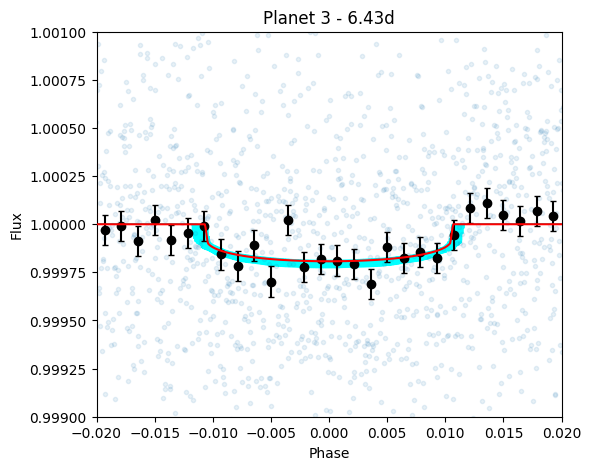

In [36]:
srt = np.argsort(lcdata["phase_3"])
subtract_signal = (lc_comp["pl_1"]-1)+(lc_comp["pl_2"]-1)
lc_pl3 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 3 - {result.params_dict['Period_3']:.2f}d")

plt.plot(lcdata["phase_3"], lc_pl3,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t = np.array(lcdata["phase_3"])[srt],
                                f = np.array(lc_pl3)[srt],
                                err=np.array(lcdata["error"])[srt],
                                bins=700)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_3"])[srt], lc_comp["pl_3"][srt],"r",zorder=3)

plt.fill_between(np.array(lcdata["phase_3"])[srt],
                 (lcmod.sigma_low)[srt], 
                 (lcmod.sigma_high)[srt], color="cyan")


plt.ylim([0.999,1.001])
plt.xlim([-0.02,0.02])
plt.xlabel("Phase")
plt.ylabel("Flux");


### RVS

In [24]:
result.rv.names

['TOI469rv1.dat', 'TOI469rv2.dat']

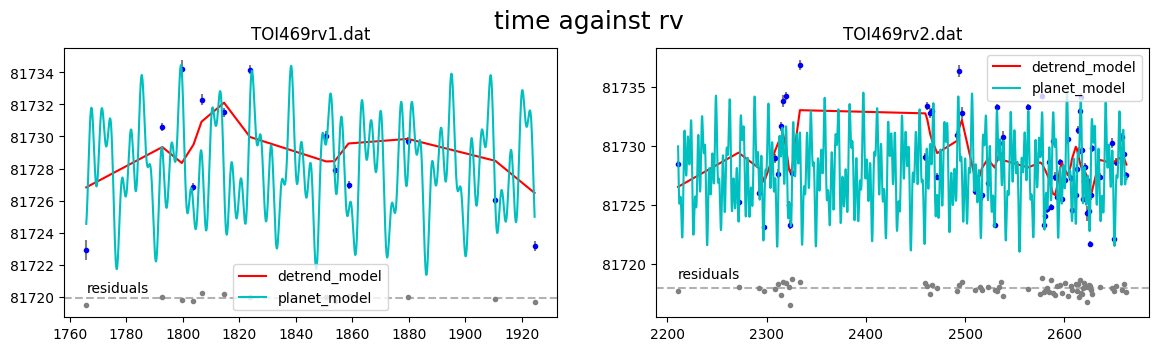

In [25]:
fig = result.rv.plot_bestfit()

In [26]:
#load output data files for the rv fits
rv1data = result.rv.outdata['TOI469rv1.dat']
rv2data = result.rv.outdata['TOI469rv2.dat']

In [27]:
#join two outputs in a single dataframe
rvdata = pd.concat([rv1data,rv2data])
rvdata

,time,RV,error,full_mod,gp+base,Rvmodel,det_RV,spl_fit,phase_1,phase_2,phase_3
0,1765.880033,81722.91,0.769538,81723.345544,81726.826511,-3.480966,-3.916510,0.0,0.371477,0.247115,-0.445902
1,1792.789313,81730.59,0.541284,81730.521301,81729.338598,1.182703,1.251402,0.0,0.345625,-0.147034,-0.260763
2,1799.679952,81734.23,0.715324,81734.371410,81728.347139,6.024271,5.882861,0.0,-0.148856,-0.199410,-0.189077
3,1803.799572,81726.85,0.536366,81727.011768,81729.486747,-2.474980,-2.636747,0.0,0.153372,-0.035008,0.451638
4,1806.664396,81732.28,0.579386,81731.936030,81730.923456,1.012575,1.356544,0.0,0.363544,-0.225271,-0.102803
...,...,...,...,...,...,...,...,...,...,...,...
65,2650.528840,81722.07,0.624461,81722.333305,81728.634470,-6.301165,-6.564470,0.0,0.272046,0.291214,0.141517
66,2652.549356,81728.62,0.582109,81728.420374,81728.758320,-0.337946,-0.138320,0.0,0.420277,-0.137691,0.455763
67,2658.552623,81730.69,0.637457,81730.822426,81729.104582,1.717844,1.585418,0.0,-0.139305,-0.440880,0.389438
68,2660.588322,81729.33,0.587836,81728.978940,81728.854264,0.124676,0.475736,0.0,0.010040,0.134506,-0.293954


In [28]:
# evaluate the RV model across both datasets
rvmod = result.rv.evaluate(file='TOI469rv1.dat', time=np.array(rvdata["time"]), 
                               return_std=True,nsamp=100)

since the RVs are sparsely sampled, we van evaluate the RV model on a smoother time array across both datasets

In [29]:
t_sm     = np.linspace(rvdata["time"].min(), rvdata["time"].max(), 1000)
rvmod_sm = result.rv.evaluate(file='TOI469rv1.dat',time=t_sm, return_std=True,nsamp=100)

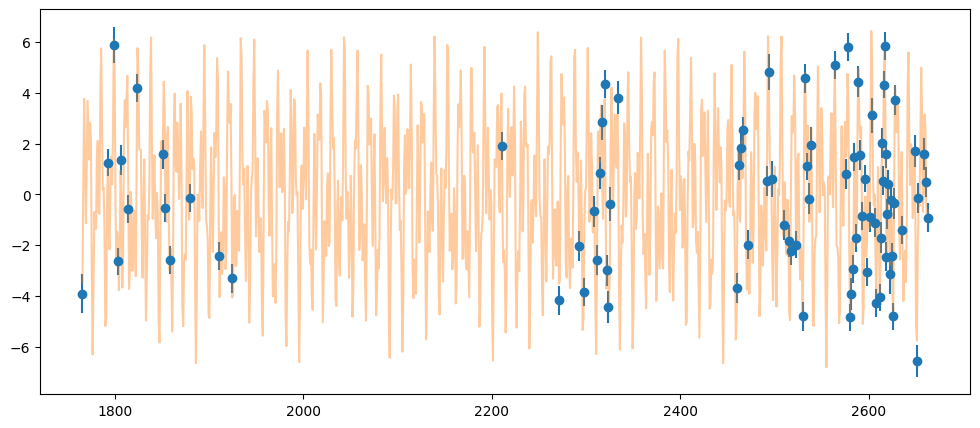

In [30]:
plt.figure(figsize=(12,5))
plt.errorbar(rvdata["time"],rvdata["det_RV"], rvdata["error"],fmt="o")
plt.plot(t_sm, rvmod_sm.planet_model, alpha=0.4)

#### Individual components

In [31]:
rv_comp    = rvmod.components
rv_comp_sm = rvmod_sm.components

##### planet 1

Text(0, 0.5, 'RV [m/s]')

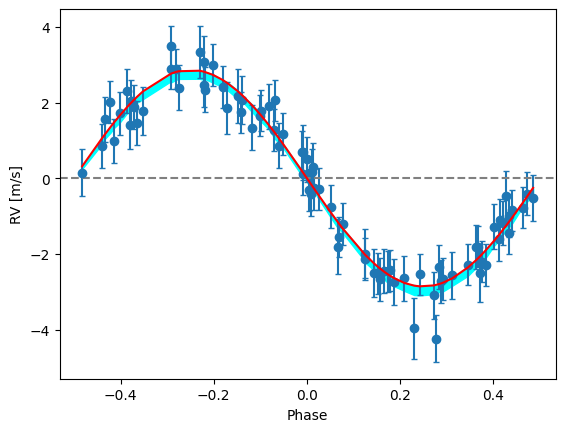

In [32]:
srt = np.argsort(rvdata["phase_1"])
subtract_signal = rv_comp["pl_2"]+rv_comp["pl_3"]

plt.errorbar(rvdata["phase_1"],(rvdata["det_RV"]-subtract_signal), rvdata["error"], fmt="o",capsize=2)
plt.plot(np.array(rvdata["phase_1"])[srt], rv_comp["pl_1"][srt],"r",zorder=4)

plt.fill_between(np.array(rvdata["phase_1"])[srt],(rvmod.sigma_low - subtract_signal)[srt], 
                 (rvmod.sigma_high-subtract_signal)[srt], color="cyan")


plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")

##### planet 2

Text(0, 0.5, 'RV [m/s]')

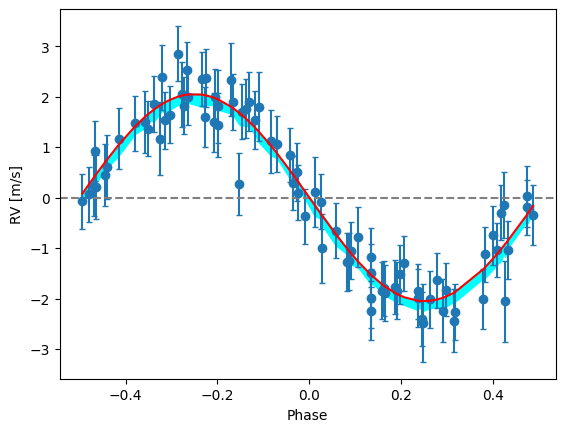

In [33]:
srt = np.argsort(rvdata["phase_2"])
subtract_signal = rv_comp["pl_1"]+rv_comp["pl_3"]

plt.errorbar(rvdata["phase_2"],(rvdata["det_RV"]-subtract_signal),
             rvdata["error"],fmt="o",capsize=2,label="RV2")
plt.plot(np.array(rvdata["phase_2"])[srt], rv_comp["pl_2"][srt],"r",zorder=4)

plt.fill_between(np.array(rvdata["phase_2"])[srt],(rvmod.sigma_low - subtract_signal)[srt], 
                 (rvmod.sigma_high-subtract_signal)[srt], color="cyan")


plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")

##### planet 3

Text(0, 0.5, 'RV [m/s]')

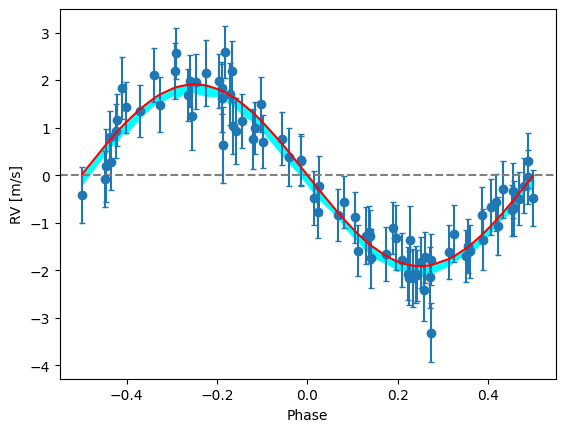

In [34]:
srt = np.argsort(rvdata["phase_3"])
subtract_signal = rv_comp["pl_1"]+rv_comp["pl_2"]

plt.errorbar(rvdata["phase_3"],(rvdata["det_RV"]-subtract_signal),
             rvdata["error"],fmt="o",capsize=2,label="RV3")
plt.plot(np.array(rvdata["phase_3"])[srt], rv_comp["pl_3"][srt],"r", zorder=4)

plt.fill_between(np.array(rvdata["phase_3"])[srt],(rvmod.sigma_low - subtract_signal)[srt], 
                 (rvmod.sigma_high-subtract_signal)[srt], color="cyan")


plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")